# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline
from path import Path

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)
# Show the total number of news
print(len(bitcoin_news_en['articles']))
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")

20
Total articles about Bitcoin: 3959


In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything( 
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
# Show the total number of news
print(len(ethereum_news_en['articles']))
print(f"Total articles about Ethereum: {ethereum_news_en['totalResults']}")

20
Total articles about Ethereum: 1358


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]      
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,compound,positive,negative,neutral
0,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
3,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954
4,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]      
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,compound,positive,negative,neutral
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791
1,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000
2,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819
3,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000
4,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.436730,0.089350,0.005850,0.904800
std,0.203956,0.036506,0.018457,0.032538
min,-0.128000,0.000000,0.000000,0.802000
25%,0.475700,0.085750,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.910000
max,0.750600,0.198000,0.071000,0.954000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.191500,0.072647,0.023647,0.903706
std,0.385822,0.072571,0.056465,0.094481
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.819000
50%,0.000000,0.062000,0.000000,0.920000
75%,0.401900,0.110000,0.000000,1.000000
max,0.817600,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score (0.089350).

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score (0.817600).

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score (0.209000).

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw_addon = {"chars", '...', '', 'nt', 'f','p', 'th', 'ul', 'li'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words_lower = [word.lower() for word in words]     
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    re_clean = (regex.sub('', w) for w in words_lower)
           
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_output = [s_words for s_words in re_clean if s_words not in sw.union(sw_addon)]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(lem) for lem in sw_output]
    
    return tokens


In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()


,text,compound,positive,negative,neutral,tokens
0,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
2,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
3,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."
4,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931,"[london, reuters, bitcoin, jumped, highest, ye..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.000,0.791,"[interacted, cryptocurrencies, past, couple, y..."
1,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.000,1.000,"[tl, dr, mega, blockchain, mastery, bundle, sa..."
2,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.000,0.819,"[london, reuters, sound, like, surefire, bet, ..."
3,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.000,1.000,"[new, york, reuters, brooklynbased, technology..."
4,An outspoken Bitcoin whale who rarely shows af...,-0.2677,0.045,0.074,0.881,"[outspoken, bitcoin, whale, rarely, show, affe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Function for N-grams where N=2
def bigram_counter(text): 
    # Combine all articles in text into one large string
    big_string = ' '.join(text)
    processed = tokenizer(big_string)
    bigram_count = Counter(ngrams(processed, n=2))
    return bigram_count    

In [17]:
# Generate the Bitcoin N-grams where N=2
bigram_counter(bitcoin_df["text"]) 

Counter({('casa', 'coloradobased'): 1,
         ('coloradobased', 'provider'): 1,
         ('provider', 'bitcoin'): 1,
         ('bitcoin', 'security'): 1,
         ('security', 'service'): 1,
         ('service', 'launching'): 1,
         ('launching', 'managed'): 1,
         ('managed', 'service'): 1,
         ('service', 'allowing'): 1,
         ('allowing', 'customer'): 1,
         ('customer', 'buy'): 1,
         ('buy', 'hold'): 1,
         ('hold', 'bitcoin'): 1,
         ('bitcoin', 'rather'): 1,
         ('rather', 'using'): 1,
         ('using', 'external'): 1,
         ('external', 'custodian'): 1,
         ('custodian', 'like'): 1,
         ('like', 'coinbas'): 1,
         ('coinbas', 'question'): 1,
         ('question', 'still'): 1,
         ('still', 'remained'): 1,
         ('remained', 'though'): 1,
         ('though', 'whether'): 1,
         ('whether', 'gpucrunching'): 1,
         ('gpucrunching', 'would'): 1,
         ('would', 'actually'): 1,
         ('actually', 

In [18]:
# Generate the Ethereum N-grams where N=2
bigram_counter(ethereum_df["text"])    

Counter({('interacted', 'cryptocurrencies'): 1,
         ('cryptocurrencies', 'past'): 1,
         ('past', 'couple'): 1,
         ('couple', 'year'): 1,
         ('year', 'good'): 1,
         ('good', 'chance'): 1,
         ('chance', 'used'): 1,
         ('used', 'metamask'): 1,
         ('metamask', 'cryptocurrency'): 1,
         ('cryptocurrency', 'wallet'): 1,
         ('wallet', 'form'): 1,
         ('form', 'browser'): 1,
         ('browser', 'extension'): 1,
         ('extension', 'support'): 1,
         ('support', 'ether'): 1,
         ('ether', 'tl'): 1,
         ('tl', 'dr'): 1,
         ('dr', 'mega'): 1,
         ('mega', 'blockchain'): 1,
         ('blockchain', 'mastery'): 1,
         ('mastery', 'bundle'): 1,
         ('bundle', 'sale'): 1,
         ('sale', 'august'): 1,
         ('august', 'saving'): 1,
         ('saving', 'list'): 1,
         ('list', 'price'): 1,
         ('price', 'cash'): 1,
         ('cash', 'necessarily'): 1,
         ('necessarily', 'king'): 1

In [19]:
# Use the token_count function to generate the top 10 words from each coin
"""Returns the top N tokens from the frequency count"""
def token_count(tokens, N=10):
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    return Counter(processed).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_df["text"]) 

[('bitcoin', 42),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('day', 13),
 ('welcome', 13)]

In [21]:
# Get the top 10 words for Ethereum
token_count(ethereum_df["text"]) 

[('bitcoin', 11),
 ('ethereum', 8),
 ('price', 6),
 ('cryptocurrency', 5),
 ('btc', 4),
 ('could', 3),
 ('new', 3),
 ('startup', 3),
 ('one', 3),
 ('trading', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
# Function for word cloud
def word_cloud(text):
    big_string = ' '.join(text)
    processed = tokenizer(big_string)
    return ' '.join(processed)

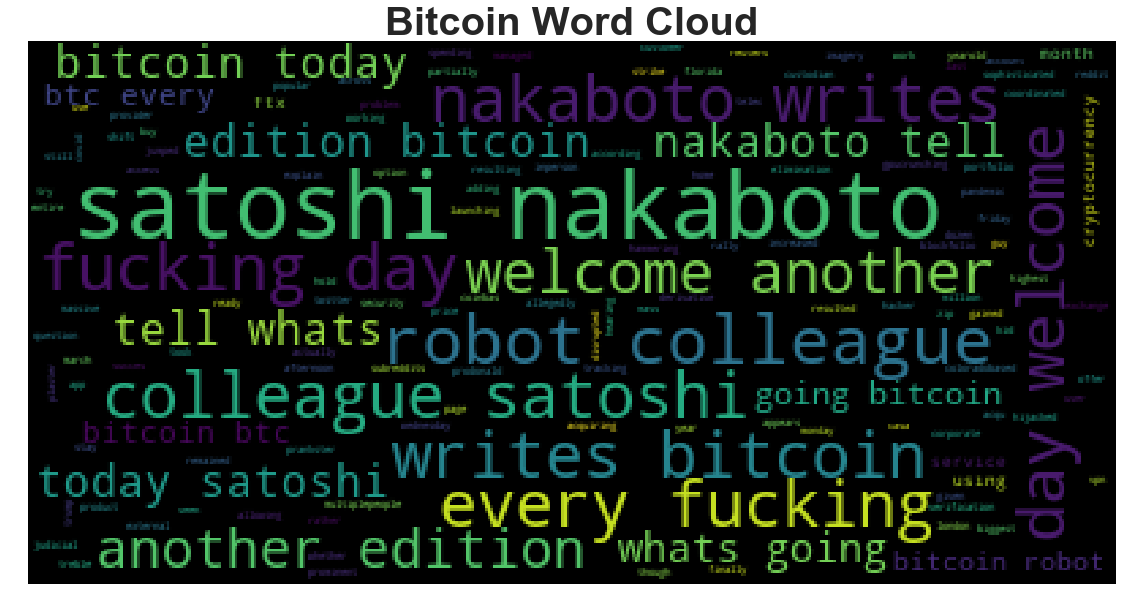

In [24]:
# Generate the Bitcoin word cloud
bitcoin_list = word_cloud(bitcoin_df["text"])
bitcoin_wc = WordCloud().generate(bitcoin_list)
plt.axis("off")
plt.title("Bitcoin Word Cloud", fontsize=40, weight="bold")
plt.imshow(bitcoin_wc)

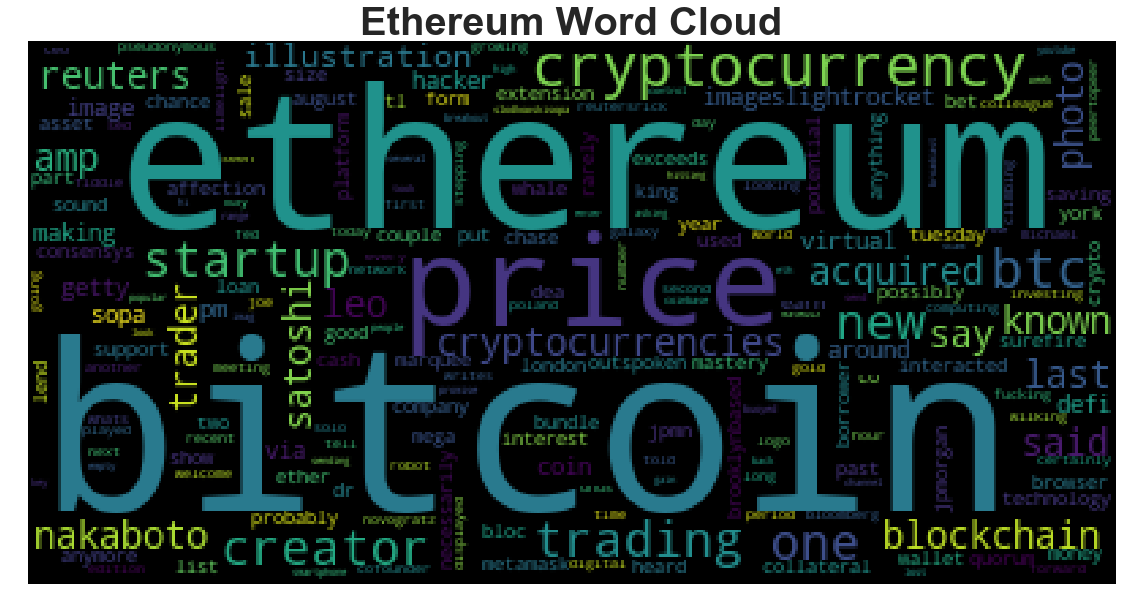

In [25]:
# Generate the Ethereum word cloud
ethereum_list = word_cloud(ethereum_df["text"])
ethereum_wc = WordCloud().generate(ethereum_list)
plt.axis("off")
plt.title("Ethereum Word Cloud", fontsize=40, weight="bold")
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = ' '.join(bitcoin_df["text"])

In [30]:
# Run the NER processor on all of the text
bit_doc = nlp(bitcoin_big_string)

# Add a title to the document
bit_doc.user_data["title"] = "BITCOIN NER" 

In [31]:
# Render the visualization
displacy.render(bit_doc, style='ent')

In [32]:
# List all Entities
for ent in bit_doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
months DATE
Guy PERSON
VPN ORG
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin 

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ethereum_big_string = ' '.join(ethereum_df["text"])

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(ethereum_big_string)

# Add a title to the document
eth_doc.user_data["title"] = "ETHEREUM NER" 

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
29.81 MONEY
August 17 DATE
97% PERCENT
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Rick Wilking PERSON
ul><li PERSON
Michael Novogratz PERSON
Bloomberg PERSON
up to $3,000 MONEY
The Galaxy Digital ORG
Fed ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
first ORDINAL
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Last week DATE
YouTube PRODUCT
Bitcoin GPE
Bitcoin GPE
one-week DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $11,595 MONEY
20:0 CARDINAL
Creator Coin PERSON
Creator Coin PERSON
Monday DATE
500 CARDINAL
less than 1% PERCENT
3 p.m. EDT TIME
Ho PERSON
DeFi LOC
this weekend DATE
ul><li PERSON
Bitcoin GPE
BTC ORG


---